In [1]:
#import packages and required packages
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import praw
import torch
import re
from bs4 import BeautifulSoup

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\Ade\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
tokens = tokenizer.encode('it was alright', return_tensors='pt')


In [4]:

result = model(tokens)

In [5]:
result.logits

tensor([[-1.8756, -0.3873,  1.5175,  1.0975, -0.3453]],
       grad_fn=<AddmmBackward0>)

In [6]:
int(torch.argmax(result.logits))+1

3

In [22]:
data = pd.read_table("C:\\Users\Ade\Downloads\\archive (1)\Restaurant_Reviews.tsv")

In [23]:
data.tail

<bound method NDFrame.tail of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [24]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [25]:
def sentiment_score(Review):
    tokens = tokenizer.encode(Review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1


In [26]:
sentiment_score(data['Review'].iloc[2])

2

In [27]:
data['sentiment'] = data['Review'].apply(lambda x: sentiment_score(x[:512]))

In [28]:
data

,Review,Liked,sentiment
0,Wow... Loved this place.,1,5
1,Crust is not good.,0,2
2,Not tasty and the texture was just nasty.,0,2
3,Stopped by during the late May bank holiday of...,1,5
4,The selection on the menu was great and so wer...,1,5
...,...,...,...
995,I think food should have flavor and texture an...,0,2
996,Appetite instantly gone.,0,1
997,Overall I was not impressed and would not go b...,0,2
998,"The whole experience was underwhelming, and I ...",0,2


In [35]:
%pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 774.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 923.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 926.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
data

,Review,Liked,sentiment
0,Wow... Loved this place.,1,5
1,Crust is not good.,0,2
2,Not tasty and the texture was just nasty.,0,2
3,Stopped by during the late May bank holiday of...,1,5
4,The selection on the menu was great and so wer...,1,5
...,...,...,...
995,I think food should have flavor and texture an...,0,2
996,Appetite instantly gone.,0,1
997,Overall I was not impressed and would not go b...,0,2
998,"The whole experience was underwhelming, and I ...",0,2


In [30]:
new_data = data

In [31]:
new_data

,Review,Liked,sentiment
0,Wow... Loved this place.,1,5
1,Crust is not good.,0,2
2,Not tasty and the texture was just nasty.,0,2
3,Stopped by during the late May bank holiday of...,1,5
4,The selection on the menu was great and so wer...,1,5
...,...,...,...
995,I think food should have flavor and texture an...,0,2
996,Appetite instantly gone.,0,1
997,Overall I was not impressed and would not go b...,0,2
998,"The whole experience was underwhelming, and I ...",0,2


In [33]:
sentiment_mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}

In [34]:
new_data['sentiment_label'] = new_data['sentiment'].map(sentiment_mapping)

In [35]:
new_data

,Review,Liked,sentiment,sentiment_label
0,Wow... Loved this place.,1,5,positive
1,Crust is not good.,0,2,negative
2,Not tasty and the texture was just nasty.,0,2,negative
3,Stopped by during the late May bank holiday of...,1,5,positive
4,The selection on the menu was great and so wer...,1,5,positive
...,...,...,...,...
995,I think food should have flavor and texture an...,0,2,negative
996,Appetite instantly gone.,0,1,negative
997,Overall I was not impressed and would not go b...,0,2,negative
998,"The whole experience was underwhelming, and I ...",0,2,negative


In [37]:
sentiment_counts = new_data['sentiment_label'].value_counts()
print(sentiment_counts)

sentiment_label
positive    480
negative    426
neutral      94
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from wordcloud import WordCloud
%matplotlib inline

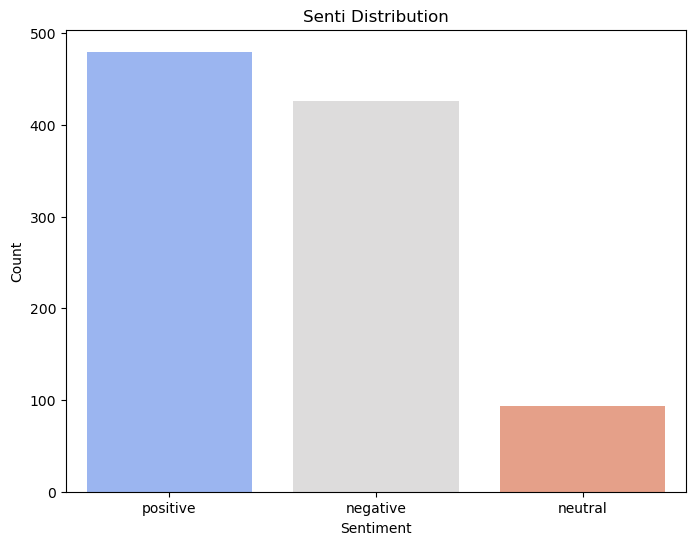

In [40]:
plt.figure(figsize = (8, 6))
sns.barplot(x = sentiment_counts.index, y = sentiment_counts.values, palette = 'coolwarm')
plt.title('Senti Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [46]:
new_data

,Review,Liked,sentiment,sentiment_label
0,Wow... Loved this place.,1,5,positive
1,Crust is not good.,0,2,negative
2,Not tasty and the texture was just nasty.,0,2,negative
3,Stopped by during the late May bank holiday of...,1,5,positive
4,The selection on the menu was great and so wer...,1,5,positive
...,...,...,...,...
995,I think food should have flavor and texture an...,0,2,negative
996,Appetite instantly gone.,0,1,negative
997,Overall I was not impressed and would not go b...,0,2,negative
998,"The whole experience was underwhelming, and I ...",0,2,negative


In [47]:
positive_reviews = new_data[new_data['sentiment_label'] == 'positive']['Review'].str.cat(sep='')
negative_reviews = new_data[new_data['sentiment_label'] == 'negative']['Review'].str.cat(sep='')

In [48]:
wc_positive = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_reviews)
wc_negative = WordCloud(width = 800, height = 400, background_color = 'black').generate(negative_reviews)

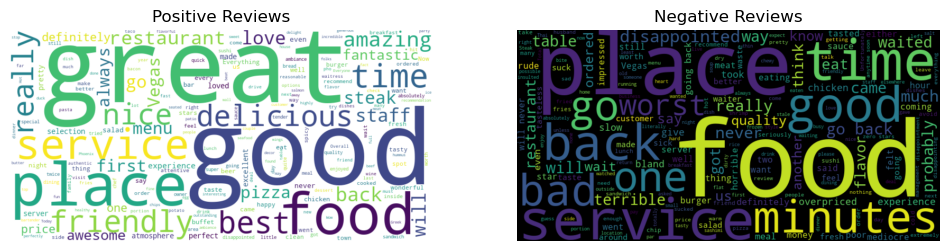

In [54]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation = 'bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation = 'bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

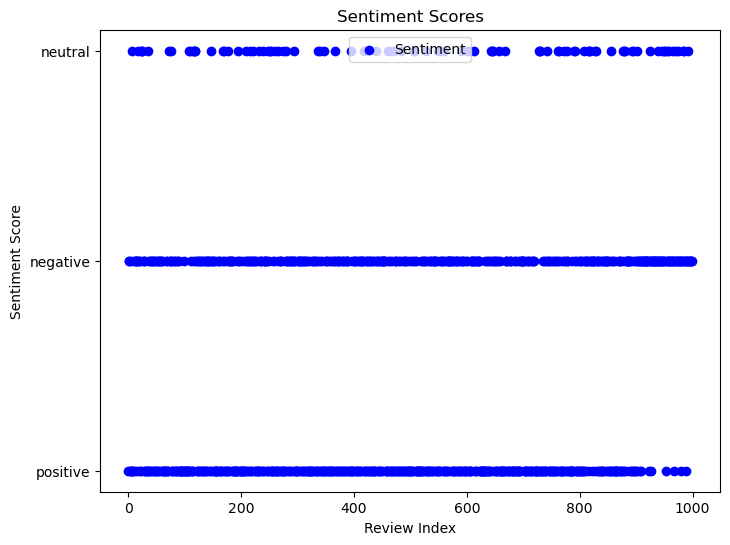

In [62]:
plt.figure(figsize = (8, 6))
plt.scatter(new_data.index, new_data['sentiment_label'], c ='blue', label = 'Sentiment')
plt.xlabel('Review Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores')
plt.legend()
plt.show()